In [116]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('/Users/fabriziosenia/Desktop/useful_scripts/INPUT/googleplaystore.csv')

## Extract df schema and descriptive stats

In [85]:
df.shape

(10841, 13)

In [86]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [87]:
df['App'].dtype

dtype('O')

In [88]:
def creo_stats (df):
    df_stats = df.describe(include='all').transpose()
    df_stats['% NAs'] = (1 - df_stats['count']/df.shape[0])*100
    df_stats['Type'] = df_stats.index.map(lambda x: df[x].dtype)
    return(df_stats)

creo_stats(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,% NAs,Type
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19,13.5965,float64
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00922424,object
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00922424,object
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object


In [90]:
missing_values_info = pd.DataFrame(df.isnull().sum()/df.shape[0]*100,columns=['% NAs']).sort_values('% NAs',ascending=False)
missing_values_info

,% NAs
Rating,13.596532
Current Ver,0.073794
Android Ver,0.027673
Type,0.009224
Content Rating,0.009224
App,0.000000
Category,0.000000
Reviews,0.000000
Size,0.000000
Installs,0.000000


## Row operations

In [103]:
# sort values 

df_sort_rating = df.sort_values(by='Rating',ascending=False)
df_sort_rating.head(50)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,"10,000+",Free,0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up
10166,FA Player Essentials,SPORTS,5.0,7,68M,100+,Free,0,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,"1,000+",Free,0,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100+,Free,0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up
6953,BxPort - Bitcoin Bx (Thailand),FINANCE,5.0,4,4.1M,50+,Free,0,Everyone,Finance,"July 14, 2018",1.0.4,4.2 and up
5125,Ag Valley Cooperative,BUSINESS,5.0,6,74M,500+,Free,0,Everyone,Business,"June 26, 2017",2.3,4.0 and up
7896,CT Checkout,FINANCE,5.0,1,8.4M,50+,Free,0,Everyone,Finance,"April 20, 2017",1.2,4.2 and up
5139,Chenoweth AH,MEDICAL,5.0,1,27M,100+,Free,0,Everyone,Medical,"April 3, 2017",300000.0.78,4.0.3 and up
5145,Arrowhead AH App,MEDICAL,5.0,3,28M,100+,Free,0,Everyone,Medical,"April 21, 2017",300000.0.80,4.0.3 and up


In [38]:
# simple filter

df_rating = df[df.Rating==19]
df_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
# simple filter

df_ROBLOX = df[df.App=='ROBLOX']
df_ROBLOX

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [35]:
# combined filter

df_GAME_HIGH_RATING = df[(df.Category=='GAME') & (df.Rating > 4.9)]
df_GAME_HIGH_RATING

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5795,Axe Champs! Wars,GAME,5.0,8,25M,50+,Free,0,Everyone,Arcade,"June 26, 2018",1.1,4.1 and up
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,15M,100+,Free,0,Everyone,Arcade,"September 27, 2017",1.1,4.2 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5+,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10+,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7466,211:CK,GAME,5.0,8,38M,10+,Paid,$0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
7698,CP Trivia,GAME,5.0,5,12M,100+,Free,0,Everyone,Trivia,"August 6, 2018",0.99,5.0 and up
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
9265,EC Mover,GAME,5.0,5,4.6M,10+,Free,0,Everyone,Racing,"August 1, 2018",1.11,4.0.3 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [53]:
# groupby

df_category_gb = df.groupby('Category').agg({'Rating':np.mean}).reset_index().sort_values('Rating',ascending=False)
df_category_gb = df.groupby('Category').agg({'Rating':'mean'}).reset_index().sort_values('Rating',ascending=False)


df_category_gb

,Category,Rating
0,1.9,19.000000
11,EVENTS,4.435556
9,EDUCATION,4.389032
1,ART_AND_DESIGN,4.358065
4,BOOKS_AND_REFERENCE,4.346067
24,PERSONALIZATION,4.335987
23,PARENTING,4.300000
15,GAME,4.286326
3,BEAUTY,4.278571
16,HEALTH_AND_FITNESS,4.277104


In [56]:
# group_by custome function: per ogni categoria voglio max - min del rating

def custom_function(x):
    z=np.max(x)-np.min(x)
    return(z)

def custom_function_1(x):
    z=x.tolist()
    return(z)

df_category_gb = df.groupby('Category').agg({'Rating':custom_function}).reset_index()
df_category_gb_1 = df.groupby('Category').agg({'Reviews':'first'}).reset_index()
df_category_gb_1 = df.groupby('Category').agg({'Reviews':custom_function_1}).reset_index()


df_category_gb_1


,Category,Reviews
0,1.9,[3.0M]
1,ART_AND_DESIGN,"[159, 967, 87510, 215644, 967, 167, 178, 36815..."
2,AUTO_AND_VEHICLES,"[367, 1598, 284, 17057, 129, 542, 10479, 805, ..."
3,BEAUTY,"[18900, 49790, 1150, 1739, 32090, 2225, 4369, ..."
4,BOOKS_AND_REFERENCE,"[2914724, 1857, 4478, 577550, 814080, 246315, ..."
5,BUSINESS,"[16129, 674730, 1254730, 85185, 32584, 217730,..."
6,COMICS,"[1013635, 24005, 57106, 2249, 516, 834, 1010, ..."
7,COMMUNICATION,"[56642847, 69119316, 125257, 9642995, 1429035,..."
8,DATING,"[1545, 57, 0, 0, 4, 2, 516801, 285726, 76646, ..."
9,EDUCATION,"[6289924, 181893, 2544, 85375, 314299, 776, 97..."


In [70]:
# group_by keys and aggregating over different columns with different functions

agg_dict = {}
rename_dict = {}


columns = ['Rating','Reviews','Size']
functions =['mean',custom_function_1,'first']
new_cols = ['mean_rating','reviews_list','first_size']


for j in np.arange(len(columns)):
    agg_dict[columns[j]]=functions[j]
    rename_dict[columns[j]]=new_cols[j]
    
df_category_gb = df.groupby('Category').agg(agg_dict).reset_index().rename(rename_dict,axis=1)
df_category_gb

,Category,mean_rating,reviews_list,first_size
0,1.9,19.000000,[3.0M],"1,000+"
1,ART_AND_DESIGN,4.358065,"[159, 967, 87510, 215644, 967, 167, 178, 36815...",19M
2,AUTO_AND_VEHICLES,4.190411,"[367, 1598, 284, 17057, 129, 542, 10479, 805, ...",25M
3,BEAUTY,4.278571,"[18900, 49790, 1150, 1739, 32090, 2225, 4369, ...",17M
4,BOOKS_AND_REFERENCE,4.346067,"[2914724, 1857, 4478, 577550, 814080, 246315, ...",Varies with device
5,BUSINESS,4.121452,"[16129, 674730, 1254730, 85185, 32584, 217730,...",Varies with device
6,COMICS,4.155172,"[1013635, 24005, 57106, 2249, 516, 834, 1010, ...",Varies with device
7,COMMUNICATION,4.158537,"[56642847, 69119316, 125257, 9642995, 1429035,...",Varies with device
8,DATING,3.970769,"[1545, 57, 0, 0, 4, 2, 516801, 285726, 76646, ...",Varies with device
9,EDUCATION,4.389032,"[6289924, 181893, 2544, 85375, 314299, 776, 97...",Varies with device


In [108]:
# sort values within a group

df_grouped = df.groupby('Category')[['App','Rating']]

df_grouped_sorted = df_grouped.apply(lambda x: x.sort_values(['Rating'],ascending=False)).reset_index()



## Columns operation

In [109]:
# drop columns

df_grouped_sorted.drop(['level_1'],axis=1,inplace=True)
df_grouped_sorted.head()

,Category,App,Rating
0,1.9,Life Made WI-Fi Touchscreen Photo Frame,19.0
1,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
2,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
3,ART_AND_DESIGN,Fantasy theme dark bw black building,4.8
4,ART_AND_DESIGN,AJ Styles HD Wallpapers,4.8


In [110]:
# rename columns

rename_dict = {'Category':'New_Category','App':'New_App'}

df_rename = df.rename(rename_dict,axis=1)
df_rename.head()

,New_App,New_Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [125]:
# create columns from another one

def parser_price (x):
    y=re.sub('\$','',x)
    if (y=='Everyone'):
        return(0)
    else:
        return(float(y))

df['Price_num'] = df['Price'].map(lambda x: parser_price(x))
df.Price_num.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [136]:
# create column from other two columns

df['Rating_times_Dollar']=df.apply(lambda row: row['Rating']*row['Price_num'],axis=1)
df[['App','Rating','Price_num','Rating_times_Dollar']].sort_values('Rating_times_Dollar',ascending=False).head(20)

,App,Rating,Price_num,Rating_times_Dollar
5362,I Am Rich Pro,4.4,399.99,1759.956
5369,I am Rich,4.3,399.99,1719.957
4197,most expensive app (H),4.3,399.99,1719.957
5356,I Am Rich Premium,4.1,399.99,1639.959
5364,I am rich (Most expensive app),4.1,399.99,1639.959
5354,I am Rich Plus,4.0,399.99,1599.960
5373,I AM RICH PRO PLUS,4.0,399.99,1599.960
4362,💎 I'm rich,3.8,399.99,1519.962
5351,I am rich,3.8,399.99,1519.962
5358,I am Rich!,3.8,399.99,1519.962


In [153]:
# missing_values

rating_median = df['Rating'].median()
most_common_androidver = df['Android Ver'].value_counts().index[0]

fill_nas = {'Rating':rating_median , 'Android Ver': most_common_androidver}

df_filled = df.fillna(value= fill_nas )

creo_stats(df_filled)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,% NAs,Type
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Rating,10841,NaN,NaN,NaN,4.20784,0.500893,1,4.1,4.3,4.5,19,0,float64
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00922424,object
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00922424,object
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object


In [161]:
# missing value filling based on condition on another columns

# se Price_num = 0
fill_1 = '4.1 and up'

# se Price_num > 0
fill_2 = '4.0.3 and up'

#-------------------------------------#

#first option

def fill_fun(x):
    if x==0:
        return (fill_1)
    else:
        return(fill_2)

df['Android Ver_filled']= df.apply(lambda row: fill_fun(row['Price_num']) if pd.isnull(row['Android Ver']) else 
                                   row['Android Ver'] ,axis=1)

print(df['Android Ver_filled'].isnull().sum())




# second option - ma sovrascrive

df.loc[ (pd.isnull(df['Android Ver'])) & (df.Price_num==0),'Android Ver'] = fill_1
df.loc[ (pd.isnull(df['Android Ver'])) & (df.Price_num>0),'Android Ver'] = fill_2

print(df['Android Ver'].isnull().sum())

0
0


In [167]:
# create dummy variable - one hot encoding

def create_dummy(df,col):
    df_dummy = pd.get_dummies(df[col],prefix=col,drop_first=True)
    df_tot = pd.concat([df,df_dummy],axis=1)
    return(df_tot)
    
create_dummy(df,'Type').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_squared,Price_num,Rating_times_Dollar,b,Android Ver_filled,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,16.81,0.0,0.0,0.0,4.0.3 and up,1,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,15.21,0.0,0.0,0.0,4.0.3 and up,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,22.09,0.0,0.0,0.0,4.0.3 and up,1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,20.25,0.0,0.0,0.0,4.2 and up,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,18.49,0.0,0.0,0.0,4.4 and up,1,0


In [191]:
# label encoder

import sklearn
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.Installs)
df['Installs_encoded'] = le.transform(df.Installs)

new_values = df.Installs_encoded.unique().tolist()
old_values = list(le.inverse_transform(new_values))

codifica = {}
for k in np.arange(0,len(old_label),1):
    codifica[old_values[k]] = new_values[k]
    
    
# sul test ( dove df['Installs'] saranno i valori di test)
df['Installs_encoded_test']=df['Installs'].map(codifica)    

/Users/fabriziosenia/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [321]:
# pivot_table

df_try = df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo","bar", "bar", "bar", "bar"],
                            "B": ["one", "one", "one", "two", "two","one", "one", "two", "two"],
                            "C": ["small", "large", "large", "small","small", "large", "small", "small","large"],
                            "D": [1, 2, 3, 3, 3, 4, 5, 6, 7]})


def unique_string (x):
    return(x.unique().tolist())

pivot_1 = df_try.pivot_table(values = 'C',index=['A','B'],aggfunc=unique_string).reset_index().rename(
            {'C':'unique_C'},axis=1)
pivot_1

,A,B,unique_C
0,bar,one,"[large, small]"
1,bar,two,"[small, large]"
2,foo,one,"[small, large]"
3,foo,two,[small]


## Dataframe manipulation ( join, concat, ....)

In [213]:
# create df 

dict_df = {'A':np.arange(1.,11.,1.),'VALUE':np.random.normal(size=10)}
macro_df = pd.DataFrame(dict_df)

dict_df1 = {'A1':np.arange(0,10,0.1),'INFO':np.random.normal(size=100)}
micro_df = pd.DataFrame(dict_df1)

lista_liste = [['aa',2],['ss',3]]
df_prova =pd.DataFrame(lista_liste,columns=['Field1','Field2'])


In [223]:
# join

df_joined = pd.merge(left=macro_df,right=micro_df,how='inner',left_on='A',right_on='A1')

# join micro with macro and assign the same VALUE for A1 < A
df_conditional_join = pd.merge(left=macro_df,right=micro_df,how='outer',left_on='A',right_on='A1').sort_values('A1',ascending=True)



In [225]:
df_conditional_join

,A,VALUE,A1,INFO
10,NaN,NaN,0.0,0.429152
11,NaN,NaN,0.1,0.359907
12,NaN,NaN,0.2,0.101478
13,NaN,NaN,0.3,3.486557
14,NaN,NaN,0.4,0.082812
15,NaN,NaN,0.5,-0.974422
16,NaN,NaN,0.6,-1.240701
17,NaN,NaN,0.7,1.075892
18,NaN,NaN,0.8,-0.326390
19,NaN,NaN,0.9,-0.506497


## Data science operations

In [227]:
import sklearn
from sklearn import datasets

In [229]:
df_iris = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names)
df_iris['TARGET']=pd.Series(datasets.load_iris().target)
df_iris['id']=df_irisi.index

In [235]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET,id
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,3
4,5.0,3.6,1.4,0.2,0,4


### Train - test split

In [238]:
# we split the original trainset into a train set (for parameter tuning) and a validation set (for model comparison)

split_size = 0.2

from sklearn.model_selection import train_test_split
df_train ,df_test = train_test_split(df_iris,test_size=split_size) 

id_train = df_train['id'].values.tolist()
id_test = df_test['id'].values.tolist()

In [239]:
X_train = df_train.drop(['id','TARGET'],axis = 1)
y_train = df_train.TARGET

X_test = df_test.drop(['id','TARGET'],axis = 1)
y_test = df_test.TARGET

### Model tuning in cross-validation

In [240]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer

In [253]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_train_bin = label_binarizer.transform(y_train)
y_test_bin = label_binarizer.transform(y_test)

In [257]:
# TRAINING AND PARAMETER TUNING
param_grid = {'max_features': [2,4],'n_estimators':[100,200] }
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=3,scoring='roc_auc')
clf = clf.fit(X_train, y_train_bin)

In [258]:
# BEST PARAMETERS
print(clf.best_score_)

best_clf=clf.best_estimator_
best_clf

0.9948406913967259


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [268]:
best_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best_model = best_clf.fit(X_train,y_train_bin)

prediction_train = best_model.predict_proba(X_train)
prediction_test = best_model.predict_proba(X_test)

In [273]:
prediction_train[0][:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0.])

In [274]:
prediction_train[1][:,1]

array([0.71, 0.  , 1.  , 0.46, 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.01, 1.  , 0.05,
       0.87, 0.  , 1.  , 0.  , 0.18, 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.01, 1.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 0.97, 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.08,
       0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.93, 1.  , 0.  , 1.  , 1.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 1.  , 0.  , 0.69, 0.  , 0.  ,
       0.  , 0.01, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.11, 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.03, 1.  ])

In [275]:
prediction_train[2][:,1]

array([0.29, 1.  , 0.  , 0.54, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 0.  , 0.82, 0.  , 0.  , 0.  , 0.  , 0.56, 0.  , 1.  ,
       0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.99, 0.  , 0.95,
       0.13, 0.  , 0.  , 0.  , 0.82, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.99, 0.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.92,
       1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.07, 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.99, 0.  , 1.  , 0.  , 0.  , 0.  , 0.31, 1.  , 0.  ,
       1.  , 0.99, 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
       0.89, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.97, 0.  ])

In [277]:
def compute_auc (y_true, y_pred):
    fpr, tpr, thresholds =roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return(roc_auc)
    

def print_roc(y_true,y_pred):
    fpr, tpr, thresholds =roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

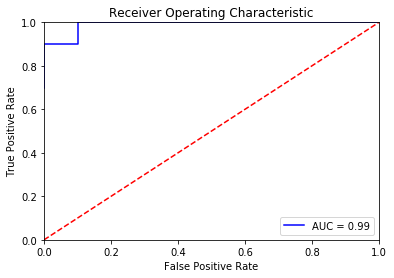

In [286]:
# PRINT ROC

print_roc(y_test_bin[:,2],prediction_test[2][:,1])

In [289]:
# FEATURE IMPORTANCE

pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(best_model.feature_importances_)}).sort_values(by='Coefficients',ascending=False)

,Feature,Coefficients
3,petal width (cm),0.503151
2,petal length (cm),0.470677
1,sepal width (cm),0.014785
0,sepal length (cm),0.011387


## Read and save pickle

In [290]:
import pickle

In [291]:
# save

output = open('test_prediction.pkl', 'wb')
pickle.dump(prediction_test, output)
output.close()

In [292]:
#load

pkl_file = open('test_prediction.pkl', 'rb')
my_obj = pickle.load(pkl_file)
pkl_file.close()

